## Codio Activity 6.1: Applying Singular Value Decomposition (SVD)

**Expected Time: 60 Minutes**

**Total Points: 20 Points**

This assignment targets the use of singular value decomposition (SVD). As demonstrated in the video lectures, you will use scipy.linalg to perform the SVD. However, rather than the Boston dataset, you will use image data to explore the information contained in the singular values of $\Sigma$. The data come from another built-in dataset in sklearn called the olivetti_faces. Each image in the dataset is a 64 pixel by 64 pixel photo of a person’s face.

## Index:

- [Problem 1](#Problem-1)
- [Problem 2](#Problem-2)
- [Problem 3](#Problem-3)
- [Problem 4](#Problem-4)
- [Problem 5](#Problem-5)

In [15]:
import numpy as np
from scipy.linalg import svd
from sklearn.datasets import fetch_olivetti_faces
import matplotlib.pyplot as plt
import seaborn as sns

### Loading the Dataset

The data can be accessed by calling the `fetch_olivetti_faces` function.  It is delivered in multiple pieces as a collection of flattened images, so after loading we select the tenth image and reshape it to `64 x 64`. 

In [18]:
#accessing the data
data = fetch_olivetti_faces(data_home='data')
X = data.data

downloading Olivetti faces from https://ndownloader.figshare.com/files/5976027 to data


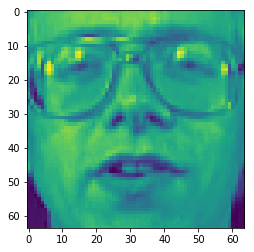

In [19]:
#what the reshaped image looks like
plt.imshow(X[10].reshape(64, 64))

In [20]:
#assign to image variable
image = X[10].reshape(64, 64)

[Back to top](#Index:) 

## Problem 1

### Scaling the Image

**2 Points**

Use the same strategy as the video to change the `image` based on subtracting the mean and dividing by the standard deviation.  Use `numpy` methods to find the `mean` and `std`.  Assign your results to `ans1` below.  Note that the image should look identical after the scaling.

[[-0.15727723  0.18584998  0.5913641 ]
 [-0.06369712  0.40420341  0.7161374 ]
 [ 0.12346309  0.6849442   0.8721044 ]]
<class 'numpy.ndarray'>


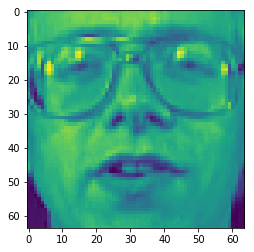

In [21]:
### GRADED

ans1 = None

### BEGIN SOLUTION
ans1 = (image -  image.mean()) / image.std()
type(ans1)
### END SOLUTION

# Answer check
print(ans1[:3, :3])
print(type(ans1))
plt.imshow(ans1)

In [22]:
### BEGIN HIDDEN TESTS
image_ = X[10].reshape(64, 64)
ans1_ = (image -  image.mean()) / image.std()
#
#
#
assert type(ans1_) == type(ans1)
assert np.allclose(ans1_,ans1)
### END HIDDEN TESTS

[Back to top](#Index:) 

## Problem 2

### SVD of Scaled Image

**2 Points**

Below, use `scipy` to factor the scaled image.  Assign your factors to variables `U`, `sigma`, and `VT` respectively.  Remember to set `full_matrices = False`. 

In [23]:
### GRADED

U, sigma, VT = None, None, None

### BEGIN SOLUTION
norm_image = (image -  image.mean()) / image.std()
U, sigma, VT = svd(norm_image, full_matrices=False)
type(ans1)
### END SOLUTION

# Answer check
print(U.shape, sigma.shape, VT.shape)
print(type(U))

(64, 64) (64,) (64, 64)
<class 'numpy.ndarray'>


In [24]:
### BEGIN HIDDEN TESTS
norm_image = (image -  image.mean()) / image.std()
U_, sigma_, VT_ = svd(norm_image, full_matrices=False)
#
#
#
assert type(U) == type(U_)
assert np.allclose(U_, U)
assert np.allclose(sigma_, sigma)
assert np.allclose(VT_, VT)
### END HIDDEN TESTS

[Back to top](#Index:) 

## Problem 3

### Converting $\Sigma$

**2 Points**

As noted, `scipy` returns a single dimension vector that is the main diagonal of $\Sigma$.  To create a diagonal matrix with the singular values as the main diagonal, use `np.diag`.  Assign your answer to the variable `Sigma` below.

In [25]:
### GRADED

Sigma = None

### BEGIN SOLUTION
norm_image = (image -  image.mean()) / image.std()
U, sigma, VT = svd(norm_image, full_matrices=False)
Sigma = np.diag(sigma)
### END SOLUTION

# Answer check
print(Sigma.shape)
print(type(Sigma))

(64, 64)
<class 'numpy.ndarray'>


In [26]:
### BEGIN HIDDEN TESTS
norm_image = (image -  image.mean()) / image.std()
U_, sigma_, VT_ = svd(norm_image, full_matrices=False)
Sigma_ = np.diag(sigma_)
#
#
#
assert type(Sigma) == type(Sigma_)
assert np.allclose(Sigma_, Sigma)
### END HIDDEN TESTS

[Back to top](#Index:) 

## Problem 4

### Reconstructing the Image

**2 Points**

Using the decomposed elements and the updated `Sigma` array, multiply the factored elements together to reconstruct the original image.  Assign your results to `ans4` below. Note that the reconstructed image should look like the original image.

(64, 64)
<class 'numpy.ndarray'>


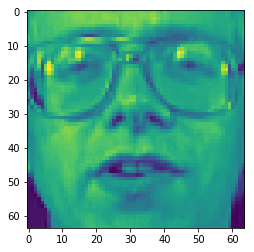

In [27]:
### GRADED

ans4 = None

### BEGIN SOLUTION
ans4 = U @ Sigma @ VT
### END SOLUTION

# Answer check
print(ans4.shape)
print(type(ans4))
plt.imshow(ans4)

In [28]:
### BEGIN HIDDEN TESTS
norm_image = (image -  image.mean()) / image.std()
U_, sigma_, VT_ = svd(norm_image, full_matrices=False)
Sigma_ = np.diag(sigma_)
ans4_ = U_ @ Sigma_ @ VT_
#
#
#
assert type(ans4) == type(ans4_)
assert np.allclose(ans4_, ans4)
### END HIDDEN TESTS

[Back to top](#Index:) 

## Problem 5

### Examining Singular Values

**2 Points**

Extract the first ten singular values (first 10 rows and columns) of Sigma.  Assign these to `top_10` below.  Standardize the singular values in the first ten entries of Sigma by dividing each by the sum of the main diagonal.  Assign your standardized singular values from the first 10 rows and columns to `ans5` below.  

(10, 10)
<class 'numpy.ndarray'>


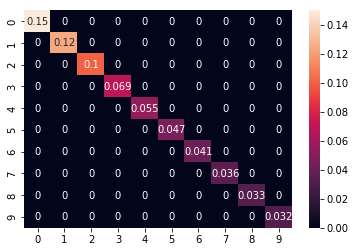

In [29]:
### GRADED

top_10 = None
ans5 = None

### BEGIN SOLUTION
top_10 = Sigma[:10, :10]
ans5 = top_10/Sigma.sum()
### END SOLUTION

# Answer check
print(top_10.shape)
print(type(ans5))
sns.heatmap(ans5, annot = True)

In [30]:
### BEGIN HIDDEN TESTS
norm_image = (image -  image.mean()) / image.std()
U_, sigma_, VT_ = svd(norm_image, full_matrices=False)
Sigma_ = np.diag(sigma_)
ans4_ = U_ @ Sigma_ @ VT_
top_10_ = Sigma_[:10, :10]
ans5_ = top_10_/Sigma_.sum()
#
#
#
assert type(ans5) == type(ans5_)
assert np.allclose(ans5_, ans5)
assert np.allclose(top_10_, top_10)
### END HIDDEN TESTS